In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.384698316056586 110.4751749327026
-56.202251816773575 -23.65029249698003
71.49188088755082 7.722734348501916
-20.46901377538991 -83.79619161736738
-1.8078769365181273 45.64861783792611
-41.296421681147415 -127.25560765949717
73.52461427785983 143.86796840241578
76.5017643183719 -74.34998365433901
82.10974713498626 -40.36626739406495
35.09574101914335 131.96099817176224
44.67761824432466 -26.50547279678858
43.71654347255429 -49.44564350879216
-15.941941557879886 106.72736661793215
28.272220043581726 -140.28505100616673
-87.74677150714133 -174.35152718699018
-10.581454059889069 151.23797248309586
11.809578315509668 44.906516605045454
-0.24737324521491644 -155.75982261751162
-45.879019464601555 11.316579454588748
82.91798229812841 -99.49027781244774
35.81338473348778 96.89339193424513
78.34717643129315 -159.99000665645244
-82.22275369566633 -119.8621370673529
84.24989486856597 -170.58824687532385
-52.95159927416044 80.75462262069476
-89.01450687590642 -23.577497657572138
-61.0782931749

45.659208785869964 -60.86630037112987
49.65297389160139 62.804647014216044
66.96686835976325 -136.42665905728256
-83.26010936245456 62.90004540766827
-27.324041319814818 -50.38900651190278
77.23598199152599 -25.97275100531209
59.18161533285925 -134.05314889026076
25.4423017352468 12.32751125376467
-50.5039363927485 -89.17706517342906
81.04069266396903 72.91106679209892
-55.10614552671064 -101.15259324982371
45.40142074753783 173.0007738643335
46.899505870491595 -49.502766006979726
42.313556247490396 78.03973640149195
33.976173551714396 35.686234641308204
65.8467818486198 28.218454732571416
59.844489137378304 -92.41306707113402
-67.7820799705727 -83.85934996887421
26.185611361788972 53.47423660498126
32.10655285365414 116.69955742696817
-51.9352841913741 135.9248746952083
61.15098048717903 48.88162208174859
-76.45132937778595 62.66574778340703
77.33857045093177 31.771963812444397
-86.79991146382021 -108.42063523144361
43.27731956496311 102.50976172016874
77.77722183712496 173.4489598389

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guilin
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | sorland
Processing Record 4 of Set 1 | marcona
City not found. Skipping...
Processing Record 5 of Set 1 | barawe
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | hamada
Processing Record 11 of Set 1 | lagoa
Processing Record 12 of Set 1 | torbay
Processing Record 13 of Set 1 | kawalu
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | samarai
Processing Record 17 of Set 1 | aden
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | yumen
Processing Record 22 of Set 1 | barrow
Processing Record 23 

City not found. Skipping...
Processing Record 40 of Set 4 | odate
Processing Record 41 of Set 4 | micheweni
Processing Record 42 of Set 4 | saldanha
Processing Record 43 of Set 4 | ekhabi
Processing Record 44 of Set 4 | kaitangata
Processing Record 45 of Set 4 | gillette
Processing Record 46 of Set 4 | klyuchi
Processing Record 47 of Set 4 | nueve de julio
Processing Record 48 of Set 4 | beauchamps
Processing Record 49 of Set 4 | dumabato
Processing Record 50 of Set 4 | chegdomyn
Processing Record 1 of Set 5 | naftah
City not found. Skipping...
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | salvador
Processing Record 4 of Set 5 | camopi
Processing Record 5 of Set 5 | carnarvon
Processing Record 6 of Set 5 | dindori
Processing Record 7 of Set 5 | berdyuzhye
City not found. Skipping...
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | wainwright
Processing Record 10 of Set 5 | totness
Processing Record 11 of Set 5 | mutsamudu
City not 

Processing Record 26 of Set 8 | pathein
Processing Record 27 of Set 8 | alice springs
Processing Record 28 of Set 8 | guarapari
Processing Record 29 of Set 8 | lucea
Processing Record 30 of Set 8 | yomitan
City not found. Skipping...
Processing Record 31 of Set 8 | coihueco
Processing Record 32 of Set 8 | cockburn town
Processing Record 33 of Set 8 | pangai
Processing Record 34 of Set 8 | uyuni
Processing Record 35 of Set 8 | puerto colombia
Processing Record 36 of Set 8 | ouegoa
Processing Record 37 of Set 8 | kichera
Processing Record 38 of Set 8 | salme
Processing Record 39 of Set 8 | ashland
Processing Record 40 of Set 8 | san cristobal
Processing Record 41 of Set 8 | guerrero negro
Processing Record 42 of Set 8 | fuerte olimpo
Processing Record 43 of Set 8 | gushikawa
Processing Record 44 of Set 8 | tautira
Processing Record 45 of Set 8 | puerto morazan
Processing Record 46 of Set 8 | diamantino
Processing Record 47 of Set 8 | sao filipe
Processing Record 48 of Set 8 | ponta do so

Processing Record 13 of Set 12 | koungheul
Processing Record 14 of Set 12 | odesa
Processing Record 15 of Set 12 | andselv
City not found. Skipping...
Processing Record 16 of Set 12 | flin flon
Processing Record 17 of Set 12 | rangapara
Processing Record 18 of Set 12 | ibotirama
Processing Record 19 of Set 12 | puerto narino
Processing Record 20 of Set 12 | omsukchan
Processing Record 21 of Set 12 | emerald
Processing Record 22 of Set 12 | ust-shonosha
Processing Record 23 of Set 12 | kurobe
City not found. Skipping...
Processing Record 24 of Set 12 | vero beach
Processing Record 25 of Set 12 | charters towers
Processing Record 26 of Set 12 | khandyga
Processing Record 27 of Set 12 | msanga
Processing Record 28 of Set 12 | zhoucheng
Processing Record 29 of Set 12 | kharp
Processing Record 30 of Set 12 | rabo de peixe
Processing Record 31 of Set 12 | ucluelet
Processing Record 32 of Set 12 | saint-louis
Processing Record 33 of Set 12 | seybaplaya
Processing Record 34 of Set 12 | de aar


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guilin,25.2819,110.2864,78.91,69,6,0.92,CN,2022-08-02 17:25:57
1,Cidreira,-30.1811,-50.2056,63.55,72,25,8.61,BR,2022-08-02 17:28:41
2,Sorland,67.6670,12.6934,55.26,74,34,7.11,NO,2022-08-02 17:28:41
3,Rikitea,-23.1203,-134.9692,72.07,76,92,20.11,PF,2022-08-02 17:28:42
4,Chokurdakh,70.6333,147.9167,52.34,68,100,5.30,RU,2022-08-02 17:28:42
5,Qaanaaq,77.4840,-69.3632,46.09,57,92,2.44,GL,2022-08-02 17:28:43
6,Tasiilaq,65.6145,-37.6368,50.16,63,4,4.90,GL,2022-08-02 17:28:43
7,Hamada,34.8833,132.0833,77.34,89,78,5.75,JP,2022-08-02 17:28:43
8,Lagoa,39.0500,-27.9833,74.59,74,0,13.80,PT,2022-08-02 17:28:44
9,Torbay,47.6666,-52.7314,82.89,53,75,8.05,CA,2022-08-02 17:28:44


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Guilin,CN,2022-08-02 17:25:57,25.2819,110.2864,78.91,69,6,0.92
1,Cidreira,BR,2022-08-02 17:28:41,-30.1811,-50.2056,63.55,72,25,8.61
2,Sorland,NO,2022-08-02 17:28:41,67.6670,12.6934,55.26,74,34,7.11
3,Rikitea,PF,2022-08-02 17:28:42,-23.1203,-134.9692,72.07,76,92,20.11
4,Chokurdakh,RU,2022-08-02 17:28:42,70.6333,147.9167,52.34,68,100,5.30
...,...,...,...,...,...,...,...,...,...
555,Nizhniy Odes,RU,2022-08-02 17:44:07,63.6445,54.8560,66.13,67,100,3.80
556,Gimli,CA,2022-08-02 17:44:08,50.6336,-96.9907,71.96,66,84,14.67
557,Port-Gentil,GA,2022-08-02 17:44:08,-0.7193,8.7815,75.78,75,87,12.39
558,Kalaleh,IR,2022-08-02 17:44:09,37.3807,55.4916,88.16,45,0,4.61


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

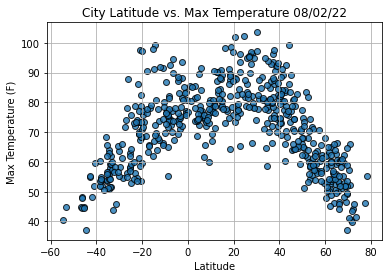

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,max_temps, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


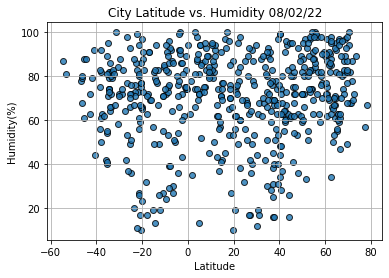

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,humidity, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

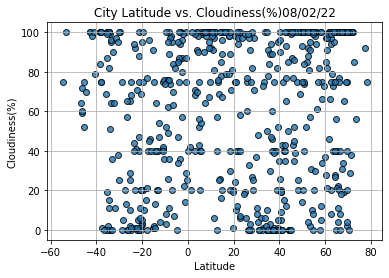

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,cloudiness, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%)" + time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

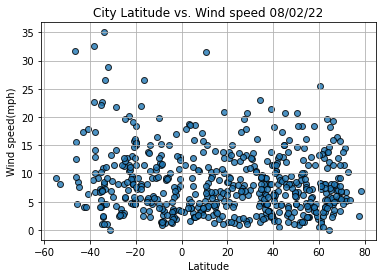

In [27]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,wind_speed, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind speed "+ time.strftime("%x"))
plt.ylabel("Wind speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()